In [1]:
import pandas as pd
import os


In [2]:
df = pd.read_csv('C:\\Users\\dell\\Documents\\Sales_Data\\Sales_April_2019.csv')
files = [file for file in os.listdir('C:\\Users\\dell\\Documents\\Sales_Data')]
all_df = pd.DataFrame()
for file in files:
    new_mdf = pd.read_csv('C:\\Users\\dell\\Documents\\Sales_Data\\'+file)
#     all_df = pd.merge(all_df, new_mdf)   #----can not do this because no common column is there
    all_df = pd.concat([all_df, new_mdf])

    
all_df.to_csv('C:\\Users\\dell\\Documents\\all_month_Sales_Data.csv', index=False)

In [3]:
all_df = pd.read_csv('C:\\Users\\dell\\Documents\\all_month_Sales_Data.csv')
new_df = all_df[all_df.isna().any(axis=1)]
all_df = all_df.dropna(how='all')   #--------------cleaning data with nan values


In [4]:
t = all_df[all_df['Order Date'].str[0:2] == 'Or']
t.head(15)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3036,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3209,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3618,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4138,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4645,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [5]:
all_df = all_df[all_df['Order Date'].str[0:2] != 'Or']     #-------cleaning data with Or value in month column
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
all_df['Quantity Ordered'] = pd.to_numeric(all_df['Quantity Ordered'])
all_df['Price Each'] = pd.to_numeric(all_df['Price Each'])

In [7]:
#---Adding a month column


all_df['Month'] = all_df['Order Date'].str[0:2]
all_df['Month'] = all_df['Month'].astype('int32')
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [8]:
all_df['Sales'] = all_df['Price Each'] * all_df['Quantity Ordered']
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# What was the best sales month?

In [9]:
temp_df = all_df.groupby('Month').sum()
temp_df

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


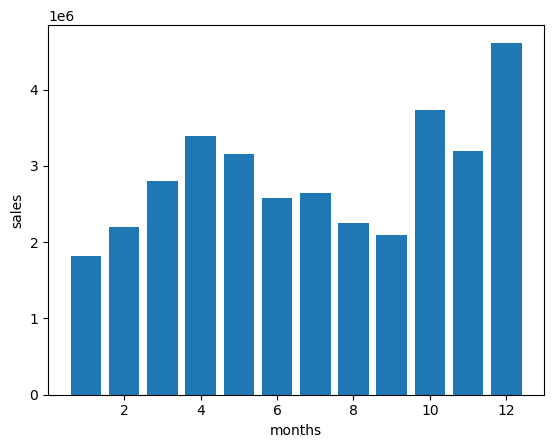

In [10]:
import matplotlib.pyplot as plt
months= range(1, 13)
plt.bar(months, temp_df['Sales'])
plt.xlabel('months')
plt.ylabel('sales')
plt.show()

# what cityhas the highest number of sales?

In [11]:
all_df.head()
# all_df['City'] = all_df['Purchase Address'].str[-8:]   #1-----making column with city code
# all_df['City'] = all_df['Purchase Address'].apply(lambda x: x.split(',')[1:])    #2------spliting address by comma to get name and code both
def get_city(address):
    return address.split(',')[1]
def get_code(address):
    return address.split(',')[2]
all_df['City'] = all_df['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_code(x))    #3-----spliting by making function basis is same as above
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001


In [12]:
# all_df['City'] = all_df['City'].astype('string')     #--------used to convert list to string while using second method of spliting
c_df = all_df.groupby('City').sum()
c_df

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA 30301,16602,2779908.20,104794,2795498.58
Austin TX 73301,11153,1809873.61,69829,1819581.75
Boston MA 02215,22528,3637409.77,141112,3661642.01
Dallas TX 75001,16730,2752627.82,104620,2767975.40
Los Angeles CA 90001,33289,5421435.23,208325,5452570.80
New York City NY 10001,27932,4635370.83,175741,4664317.43
Portland ME 04101,2750,447189.25,17144,449758.27
Portland OR 97035,11303,1860558.22,70621,1870732.34
San Francisco CA 94016,50239,8211461.74,315520,8262203.91


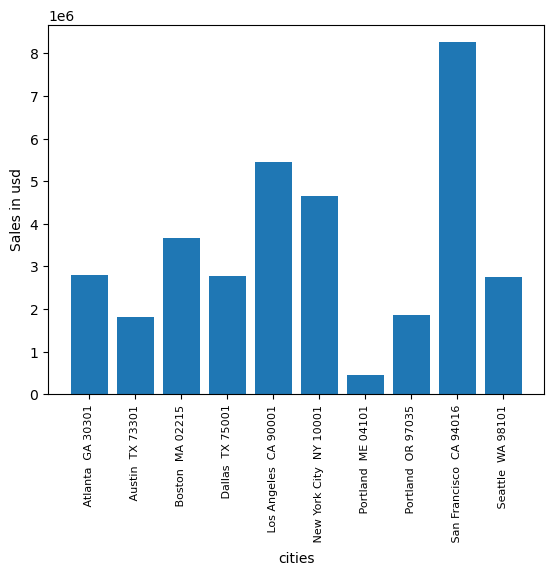

In [13]:
# cities= all_df['City'].unique()    #----wrong in order of groupby cities
cities = [city for city, df in all_df.groupby('City')]

plt.bar(cities, c_df['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('cities')
plt.ylabel('Sales in usd')
plt.show()

### What is the best time to show adds

In [14]:
all_df['Order Date'] = pd.to_datetime(all_df['Order Date'])

In [15]:
all_df['Hours'] = all_df['Order Date'].dt.hour
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001,9


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Hours,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854


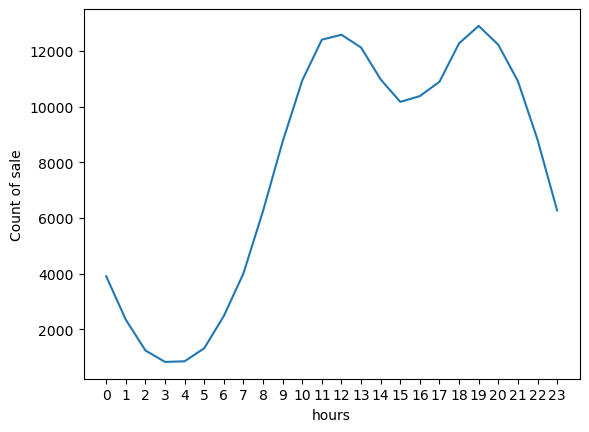

In [16]:
t_df = all_df.groupby('Hours').count()
hours = [hours for hours, df in all_df.groupby('Hours')]
plt.plot(hours, t_df['Sales'])
plt.xticks(hours)
plt.xlabel('hours')
plt.ylabel('Count of sale')
t_df.head()

### what was the most sold product together?

In [17]:
df = all_df[all_df['Order ID'].duplicated(keep=False)]
df['Groupped Product'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Groupped Product']].drop_duplicates()
df.head(10)

C:\Users\dell\AppData\Local\Temp\ipykernel_13556\2466921511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Groupped Product'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Groupped Product
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [18]:
from itertools import combinations
from collections import Counter

In [19]:
count = Counter()
for row in df['Groupped Product']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

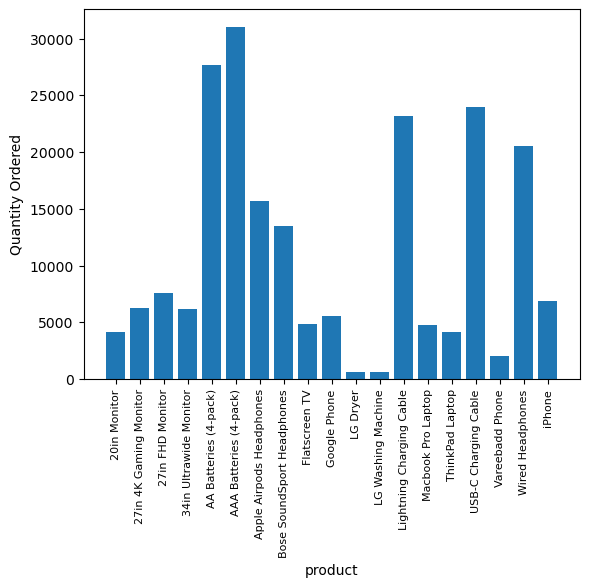

In [20]:
p_df = all_df.groupby('Product')
quantity_ordered = p_df['Quantity Ordered'].sum()
product = [product for product, df in p_df]
plt.bar(product, quantity_ordered)
plt.xticks(rotation='vertical', size=8)
plt.xlabel('product')
plt.ylabel('Quantity Ordered')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_13556\2260938364.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation='vertical', size=8)


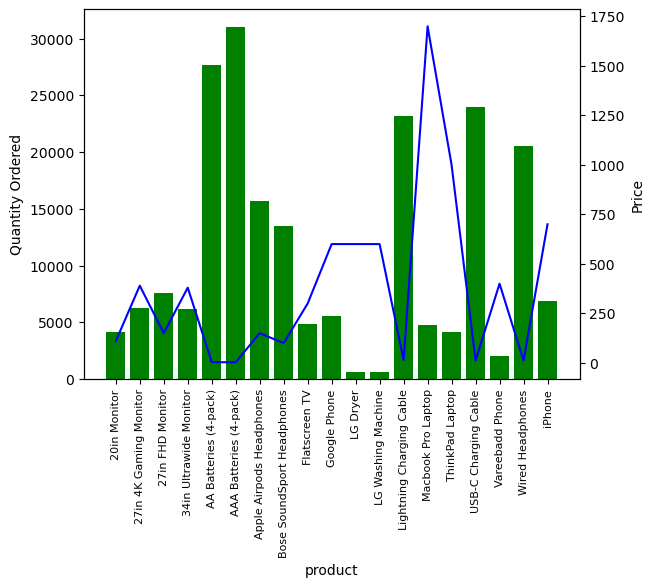

In [21]:
prices = all_df.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product, quantity_ordered, color = 'g')
ax2.plot(product, prices, 'b-')
ax1.set_xlabel('product')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price')
ax1.set_xticklabels(product, rotation='vertical', size=8)
plt.show()